# ML Methods on Breast Cancer Wisconsin (Original) Data Set

## Import packages

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
sns.set(color_codes = True)

#ignore warning messages 
import warnings
warnings.filterwarnings('ignore')

## Read Data set

In [2]:
columns=['Sample code number','Clump Thickness','Uniformity of Cell Size','Uniformity of Cell Shape','Marginal Adhesion','Single Epithelial Cell Size','Bare Nuclei','Bland Chromatin','Normal Nucleoli','Mitoses','Class']
df = pd.read_csv('./Data/breastCancerWisconsin.data',sep=',',names=columns)

In [3]:
df

,Sample code number,Clump Thickness,Uniformity of Cell Size,Uniformity of Cell Shape,Marginal Adhesion,Single Epithelial Cell Size,Bare Nuclei,Bland Chromatin,Normal Nucleoli,Mitoses,Class
0,1000025,5,1,1,1,2,1,3,1,1,2
1,1002945,5,4,4,5,7,10,3,2,1,2
2,1015425,3,1,1,1,2,2,3,1,1,2
3,1016277,6,8,8,1,3,4,3,7,1,2
4,1017023,4,1,1,3,2,1,3,1,1,2
...,...,...,...,...,...,...,...,...,...,...,...
694,776715,3,1,1,1,3,2,1,1,1,2
695,841769,2,1,1,1,2,1,1,1,1,2
696,888820,5,10,10,3,7,3,8,10,2,4
697,897471,4,8,6,4,3,4,10,6,1,4


In [4]:
df.dtypes

Sample code number              int64
Clump Thickness                 int64
Uniformity of Cell Size         int64
Uniformity of Cell Shape        int64
Marginal Adhesion               int64
Single Epithelial Cell Size     int64
Bare Nuclei                    object
Bland Chromatin                 int64
Normal Nucleoli                 int64
Mitoses                         int64
Class                           int64
dtype: object

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 699 entries, 0 to 698
Data columns (total 11 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   Sample code number           699 non-null    int64 
 1   Clump Thickness              699 non-null    int64 
 2   Uniformity of Cell Size      699 non-null    int64 
 3   Uniformity of Cell Shape     699 non-null    int64 
 4   Marginal Adhesion            699 non-null    int64 
 5   Single Epithelial Cell Size  699 non-null    int64 
 6   Bare Nuclei                  699 non-null    object
 7   Bland Chromatin              699 non-null    int64 
 8   Normal Nucleoli              699 non-null    int64 
 9   Mitoses                      699 non-null    int64 
 10  Class                        699 non-null    int64 
dtypes: int64(10), object(1)
memory usage: 60.2+ KB


In [6]:
df.isnull().values.any()

False

### Summarization

In [7]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Sample code number,699.0,1.071704e+06,617095.729819,61634.0,870688.5,1171710.0,1238298.0,13454352.0
Clump Thickness,699.0,4.417740e+00,2.815741,1.0,2.0,4.0,6.0,10.0
Uniformity of Cell Size,699.0,3.134478e+00,3.051459,1.0,1.0,1.0,5.0,10.0
Uniformity of Cell Shape,699.0,3.207439e+00,2.971913,1.0,1.0,1.0,5.0,10.0
Marginal Adhesion,699.0,2.806867e+00,2.855379,1.0,1.0,1.0,4.0,10.0
Single Epithelial Cell Size,699.0,3.216023e+00,2.214300,1.0,2.0,2.0,4.0,10.0
Bland Chromatin,699.0,3.437768e+00,2.438364,1.0,2.0,3.0,5.0,10.0
Normal Nucleoli,699.0,2.866953e+00,3.053634,1.0,1.0,1.0,4.0,10.0
Mitoses,699.0,1.589413e+00,1.715078,1.0,1.0,1.0,1.0,10.0
Class,699.0,2.689557e+00,0.951273,2.0,2.0,2.0,4.0,4.0


### Class: (2 for benign, 4 for malignant)

In [8]:
df['Class'].value_counts()

2    458
4    241
Name: Class, dtype: int64

Text(0, 0.5, 'Number of People')

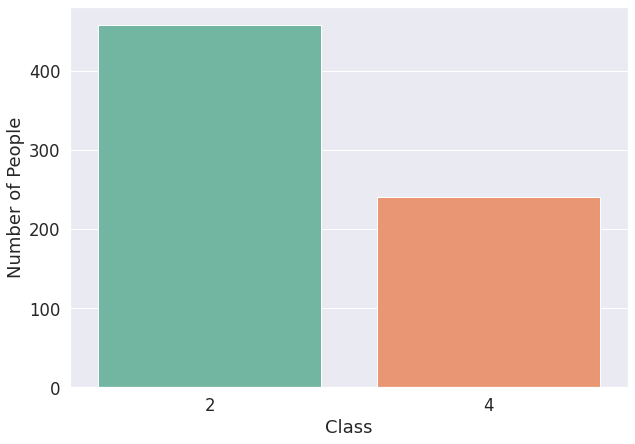

In [9]:
plt.figure(figsize=(10,7))
sns.set(font_scale = 1.5)
sns.countplot(x = 'Class', data=df, palette="Set2")
plt.ylabel('Number of People')

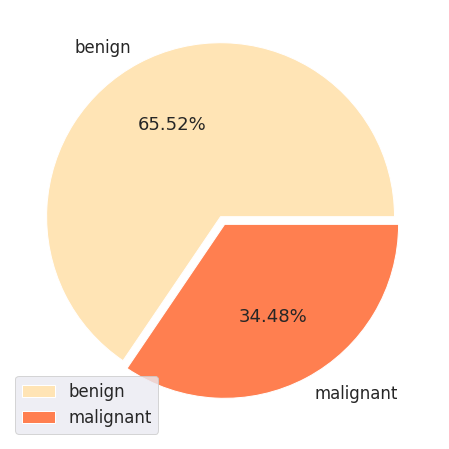

In [10]:
plt.figure(figsize=(8,8))
pieC = df['Class'].value_counts()
explode = (0.05, 0)
colors = ['moccasin', 'coral']
labels = ['benign', 'malignant']
sns.set(font_scale = 1.5)
plt.pie(pieC, labels = ('benign', 'malignant'), autopct = "%.2f%%", explode = explode, colors = colors)
plt.legend(labels, loc = 'lower left')

## Exploratory Data Analysis (EDA)

### Missing Values
There are 16 instances in Groups 1 to 6 that contain a single missing 
   (i.e., unavailable) attribute value, now denoted by "?".

In [11]:
for x in columns:
    print("Number of missing values in ", x, df[df[x] == '?'].shape[0])

Number of missing values in  Sample code number 0
Number of missing values in  Clump Thickness 0
Number of missing values in  Uniformity of Cell Size 0
Number of missing values in  Uniformity of Cell Shape 0
Number of missing values in  Marginal Adhesion 0
Number of missing values in  Single Epithelial Cell Size 0
Number of missing values in  Bare Nuclei 16
Number of missing values in  Bland Chromatin 0
Number of missing values in  Normal Nucleoli 0
Number of missing values in  Mitoses 0
Number of missing values in  Class 0


#### Replace Missing values '?' with 0

In [12]:
df['Bare Nuclei'] = df['Bare Nuclei'].replace(to_replace='?',value = 0).astype(int)

In [13]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Sample code number,699.0,1.071704e+06,617095.729819,61634.0,870688.5,1171710.0,1238298.0,13454352.0
Clump Thickness,699.0,4.417740e+00,2.815741,1.0,2.0,4.0,6.0,10.0
Uniformity of Cell Size,699.0,3.134478e+00,3.051459,1.0,1.0,1.0,5.0,10.0
Uniformity of Cell Shape,699.0,3.207439e+00,2.971913,1.0,1.0,1.0,5.0,10.0
Marginal Adhesion,699.0,2.806867e+00,2.855379,1.0,1.0,1.0,4.0,10.0
Single Epithelial Cell Size,699.0,3.216023e+00,2.214300,1.0,2.0,2.0,4.0,10.0
Bare Nuclei,699.0,3.463519e+00,3.640708,0.0,1.0,1.0,5.0,10.0
Bland Chromatin,699.0,3.437768e+00,2.438364,1.0,2.0,3.0,5.0,10.0
Normal Nucleoli,699.0,2.866953e+00,3.053634,1.0,1.0,1.0,4.0,10.0
Mitoses,699.0,1.589413e+00,1.715078,1.0,1.0,1.0,1.0,10.0


### Visualization for understanding and analyzing the distribution of data for different variables

array([[<AxesSubplot:title={'center':'Sample code number'}>,
        <AxesSubplot:title={'center':'Clump Thickness'}>,
        <AxesSubplot:title={'center':'Uniformity of Cell Size'}>],
       [<AxesSubplot:title={'center':'Uniformity of Cell Shape'}>,
        <AxesSubplot:title={'center':'Marginal Adhesion'}>,
        <AxesSubplot:title={'center':'Single Epithelial Cell Size'}>],
       [<AxesSubplot:title={'center':'Bare Nuclei'}>,
        <AxesSubplot:title={'center':'Bland Chromatin'}>,
        <AxesSubplot:title={'center':'Normal Nucleoli'}>],
       [<AxesSubplot:title={'center':'Mitoses'}>,
        <AxesSubplot:title={'center':'Class'}>, <AxesSubplot:>]],
      dtype=object)

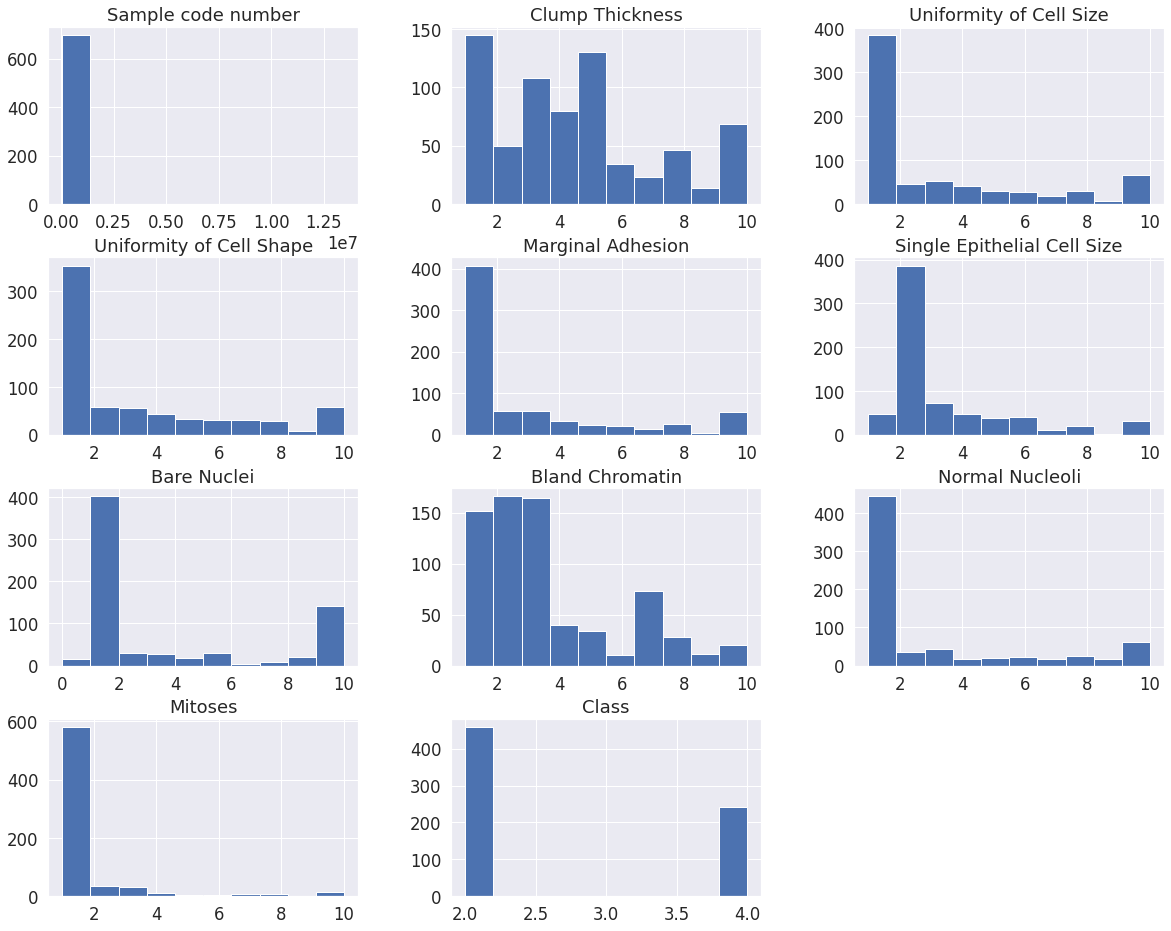

In [14]:
df.hist(figsize = (20,16),grid=True)

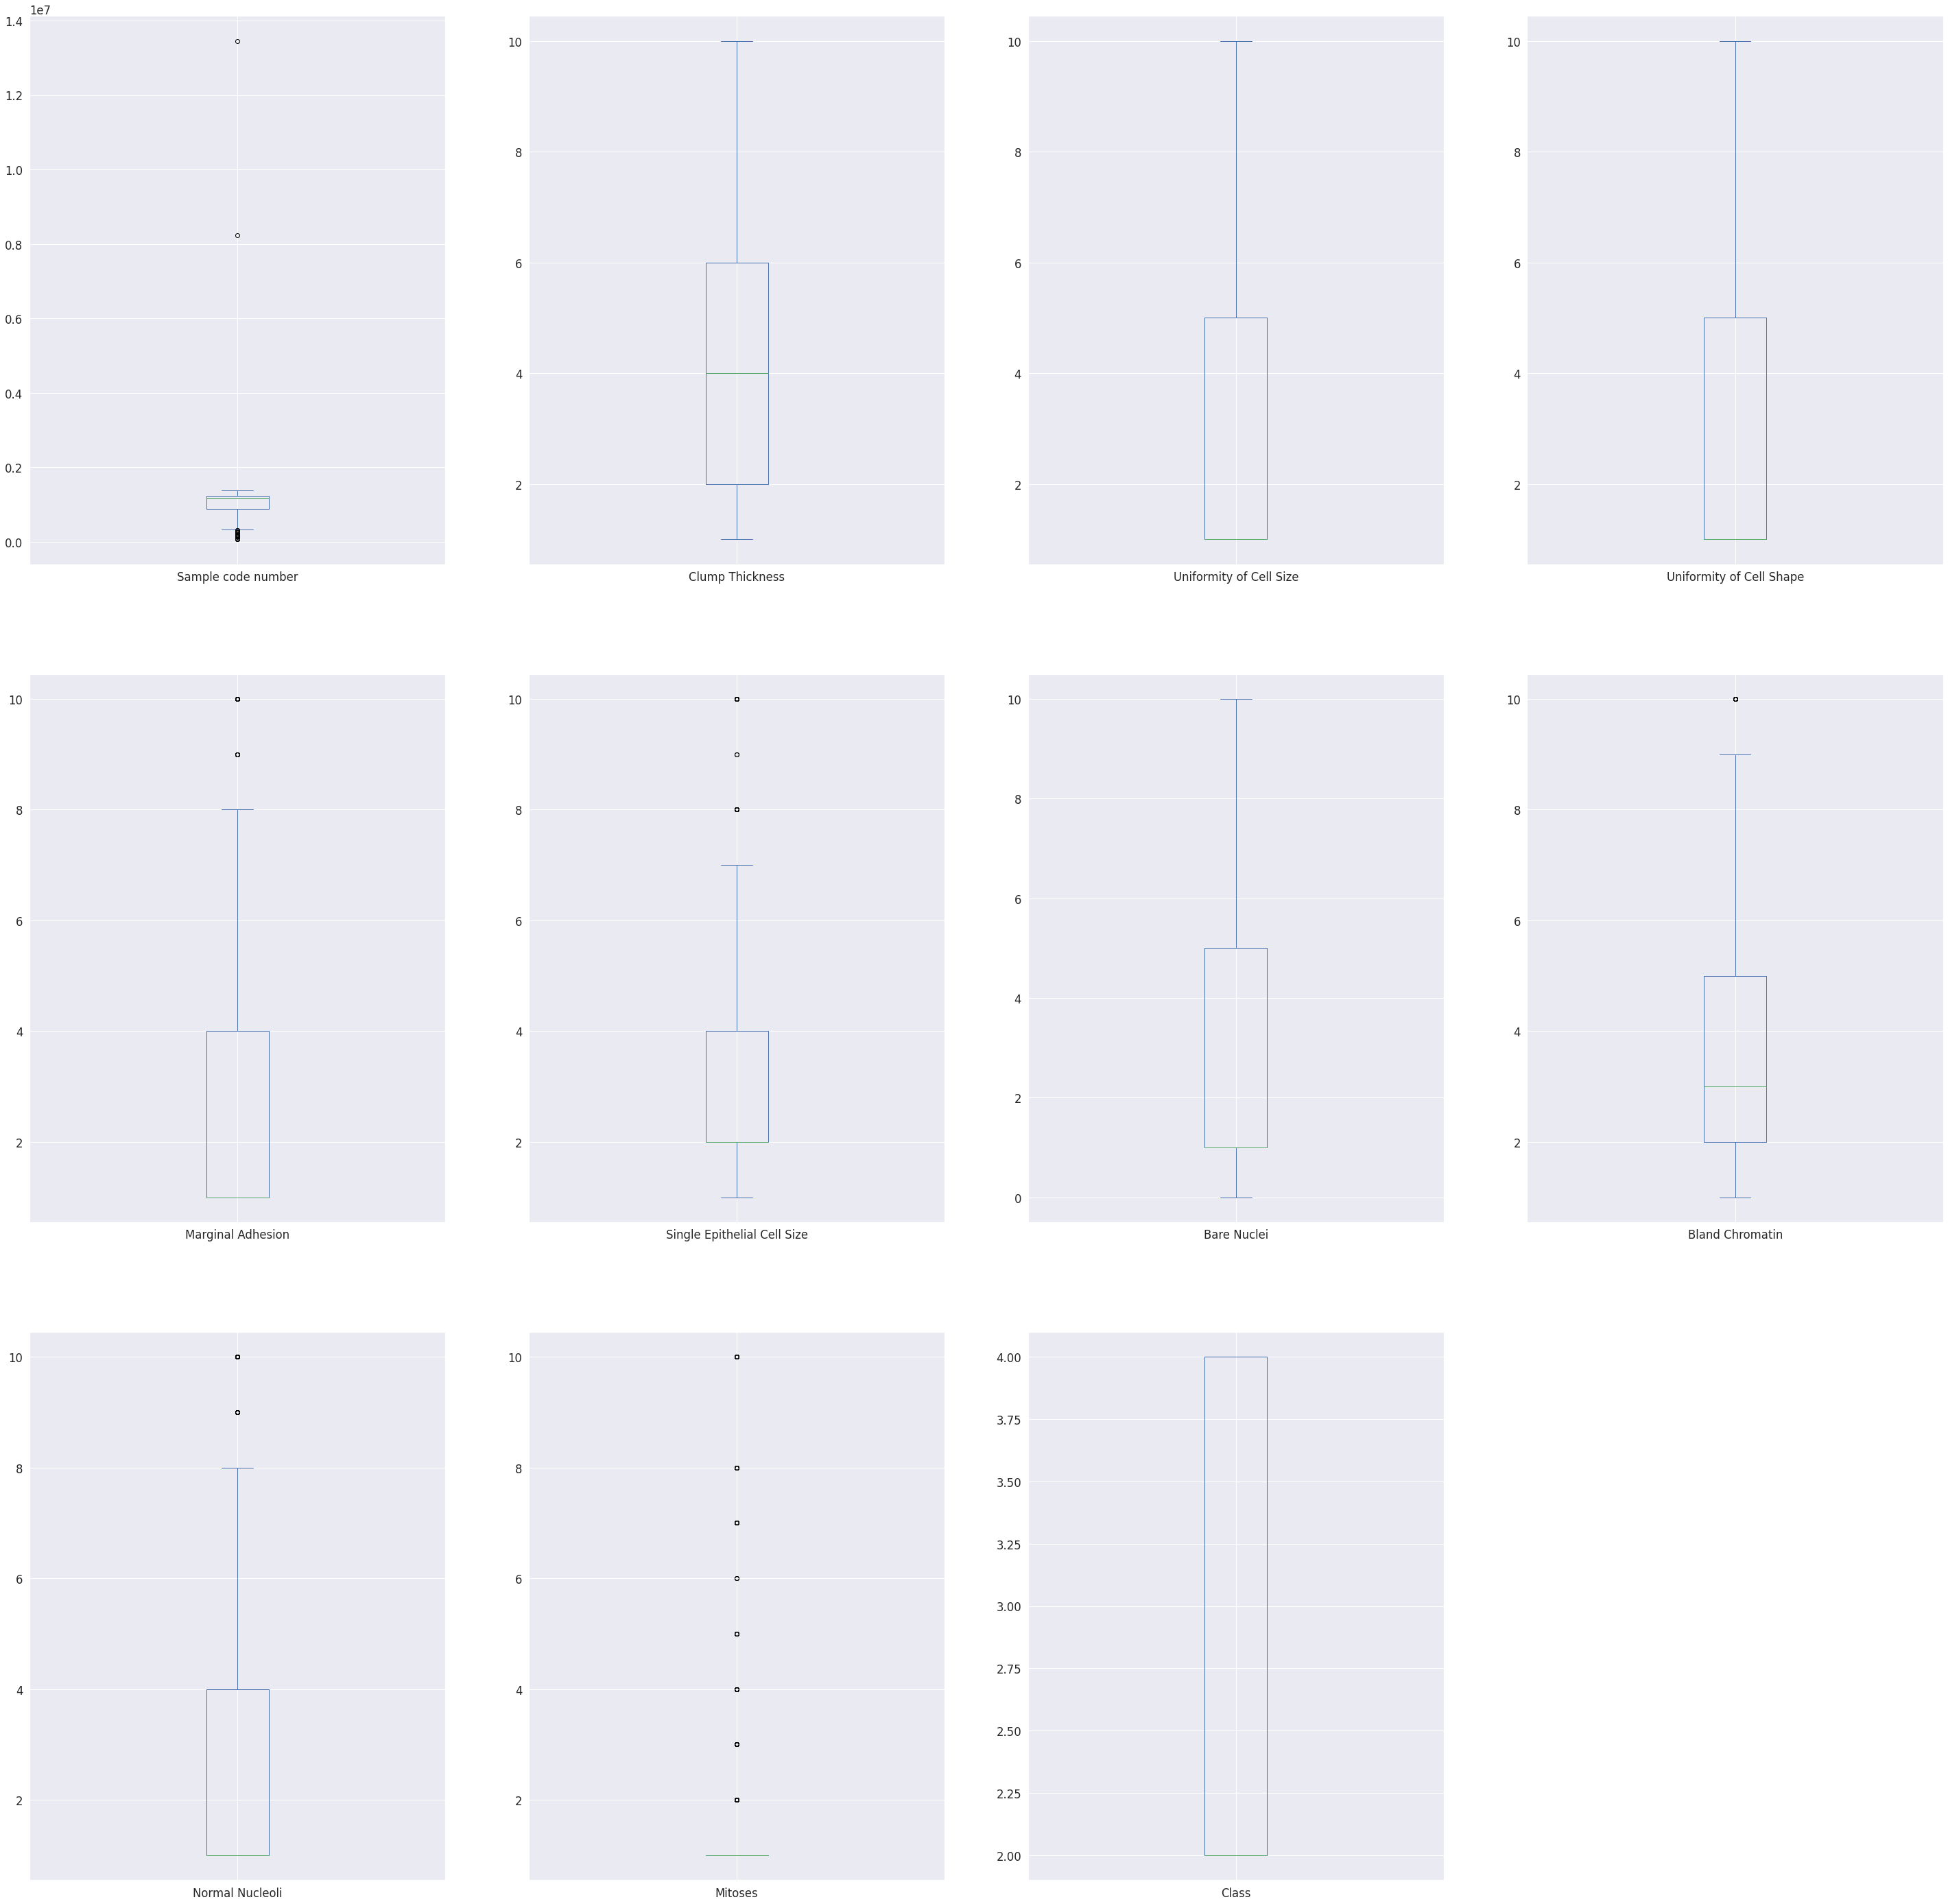

In [15]:
df.plot(kind= 'box' , subplots=True, layout=(3,4), sharex=False, sharey=False, figsize=(50,50))
sns.set(font_scale = 3)

<AxesSubplot:xlabel='Class', ylabel='Density'>

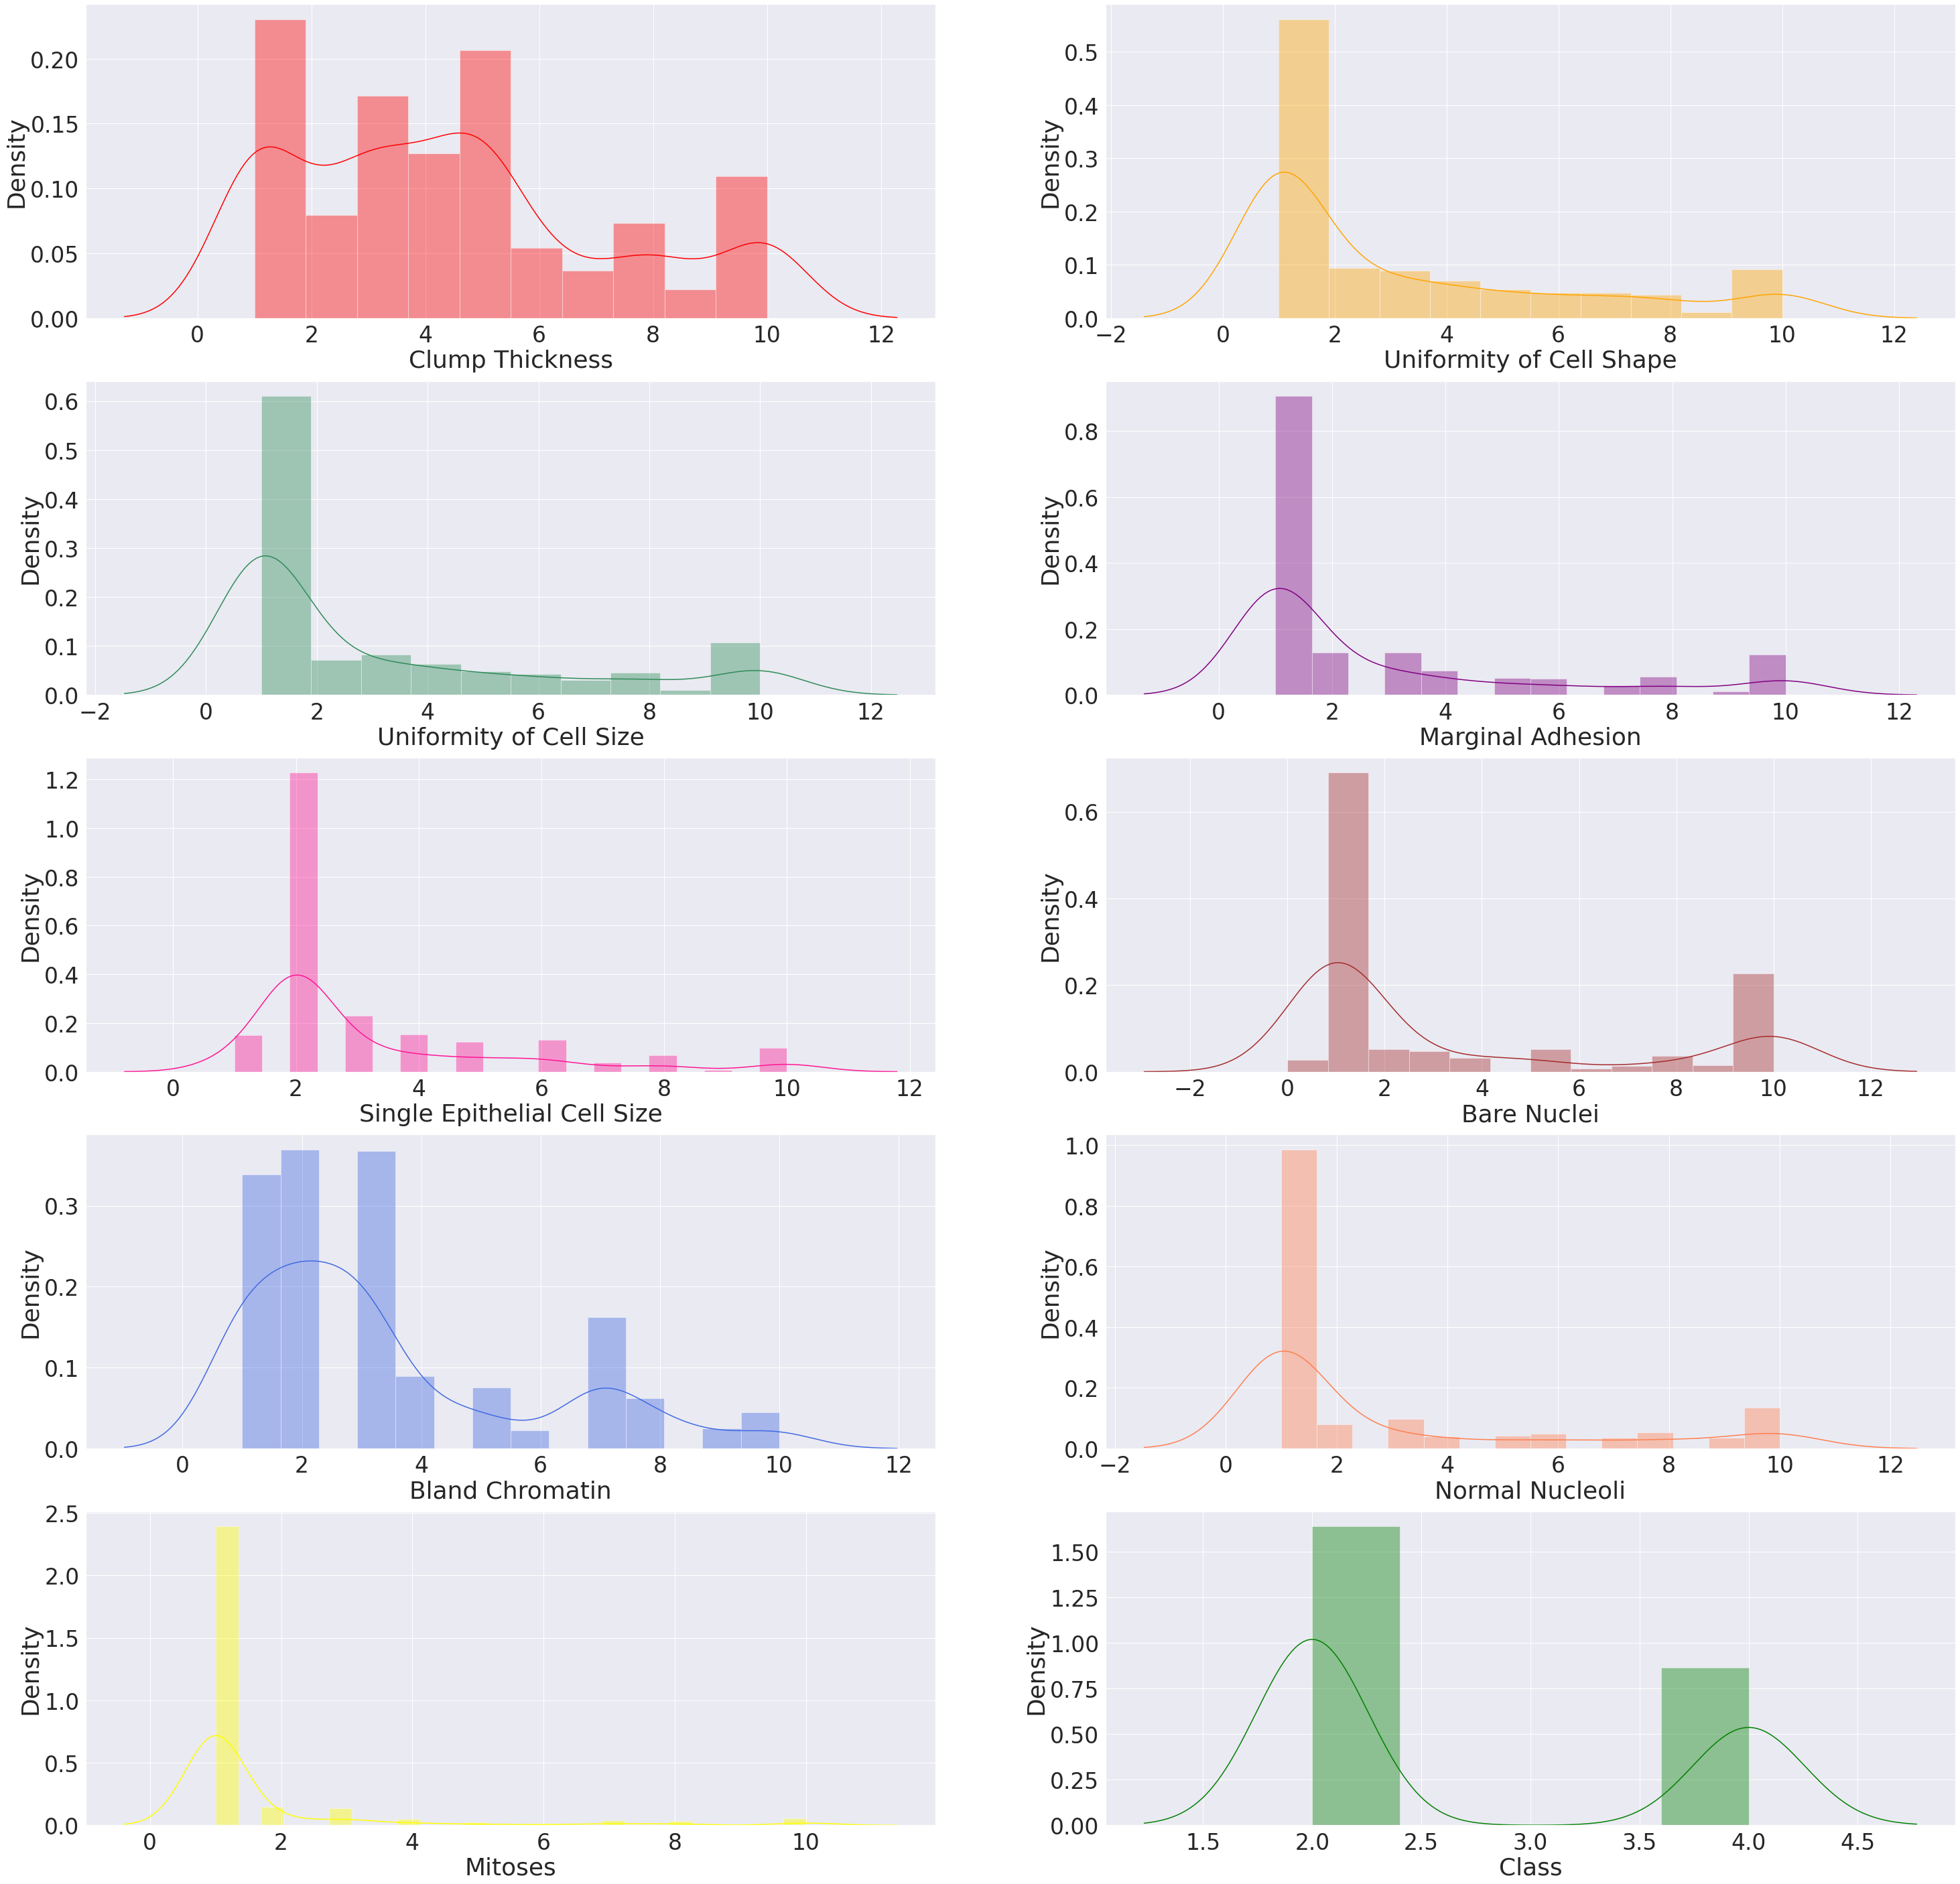

In [16]:
fig, ax = plt.subplots(5,2, figsize=(50,50))
sns.set(font_scale = 3)
sns.distplot(df['Clump Thickness'], ax = ax[0,0], color = 'red')
sns.distplot(df['Uniformity of Cell Size'], ax = ax[1,0], color = 'seagreen')
sns.distplot(df['Uniformity of Cell Shape'], ax = ax[0,1], color = 'orange')
sns.distplot(df['Marginal Adhesion'], ax = ax[1,1], color = 'purple')
sns.distplot(df['Single Epithelial Cell Size'], ax = ax[2,0], color = 'deeppink')
sns.distplot(df['Bare Nuclei'], ax = ax[2,1], color = 'brown')
sns.distplot(df['Bland Chromatin'], ax = ax[3,0], color = 'royalblue')
sns.distplot(df['Normal Nucleoli'], ax = ax[3,1], color = 'coral')
sns.distplot(df['Mitoses'], ax = ax[4,0], color = 'yellow')
sns.distplot(df['Class'], ax = ax[4,1], color = 'green')

### Data Cleaning

In [17]:
df['Bare Nuclei'] = df['Bare Nuclei'].replace(to_replace=0 ,value = df[df['Bare Nuclei'] != 0]['Bare Nuclei'].astype(int).median()).astype(int)

In [18]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Sample code number,699.0,1.071704e+06,617095.729819,61634.0,870688.5,1171710.0,1238298.0,13454352.0
Clump Thickness,699.0,4.417740e+00,2.815741,1.0,2.0,4.0,6.0,10.0
Uniformity of Cell Size,699.0,3.134478e+00,3.051459,1.0,1.0,1.0,5.0,10.0
Uniformity of Cell Shape,699.0,3.207439e+00,2.971913,1.0,1.0,1.0,5.0,10.0
Marginal Adhesion,699.0,2.806867e+00,2.855379,1.0,1.0,1.0,4.0,10.0
Single Epithelial Cell Size,699.0,3.216023e+00,2.214300,1.0,2.0,2.0,4.0,10.0
Bare Nuclei,699.0,3.486409e+00,3.621929,1.0,1.0,1.0,5.0,10.0
Bland Chromatin,699.0,3.437768e+00,2.438364,1.0,2.0,3.0,5.0,10.0
Normal Nucleoli,699.0,2.866953e+00,3.053634,1.0,1.0,1.0,4.0,10.0
Mitoses,699.0,1.589413e+00,1.715078,1.0,1.0,1.0,1.0,10.0


### Visualization of Clean Data

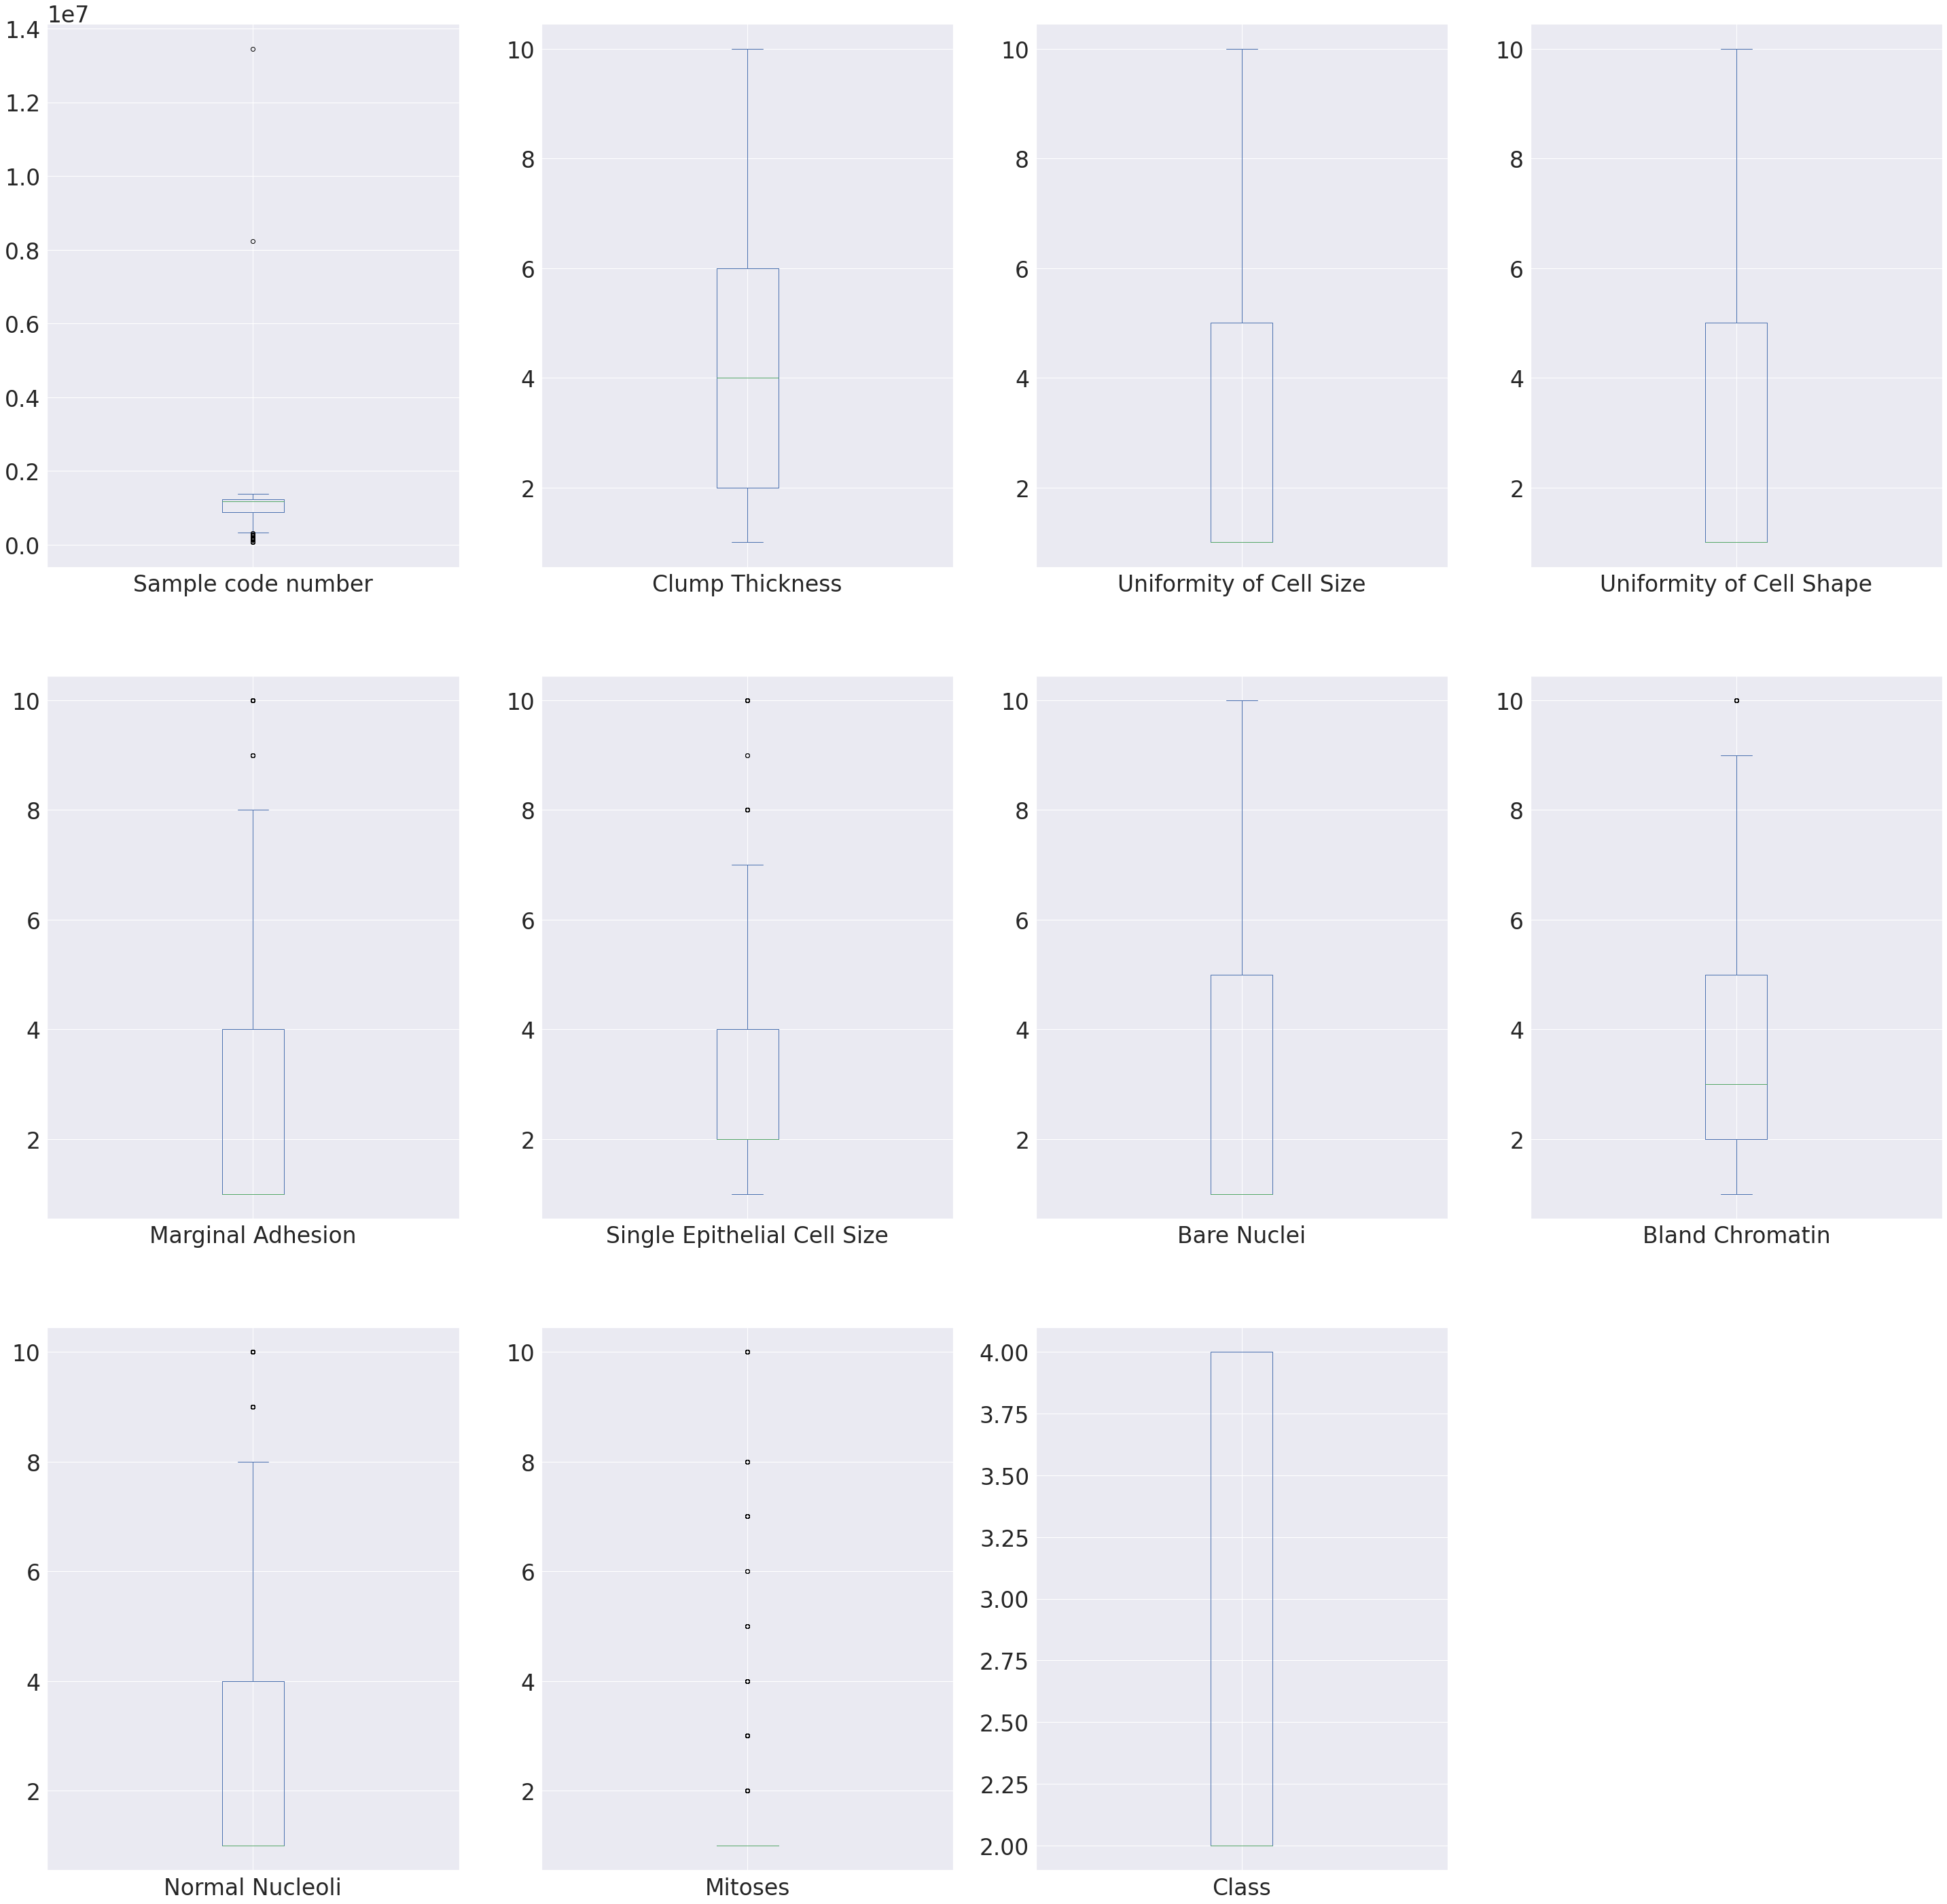

In [19]:
df.plot(kind= 'box' , subplots=True, layout=(3,4), sharex=False, sharey=False, figsize=(50,50))
sns.set(font_scale = 3)

### Class: (2 for benign, 4 for malignant)

<AxesSubplot:xlabel='Clump Thickness', ylabel='count'>

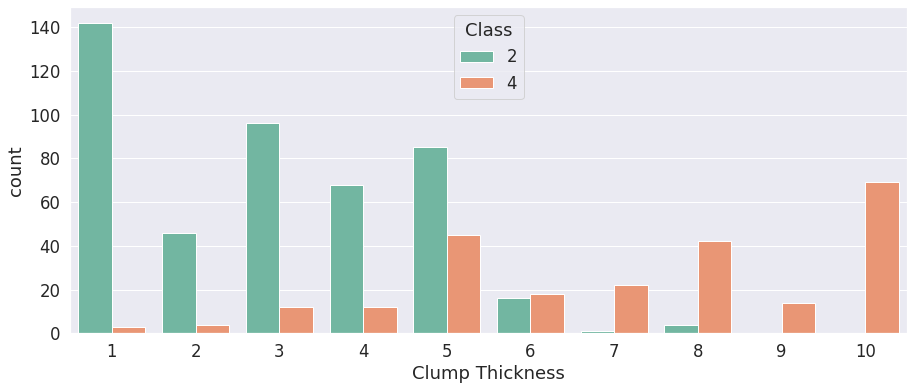

In [20]:
plt.figure(figsize=(15,6))
sns.set(font_scale = 1.5)
sns.countplot(x = 'Clump Thickness', hue = 'Class', data = df, palette = 'Set2')

<AxesSubplot:xlabel='Uniformity of Cell Size', ylabel='count'>

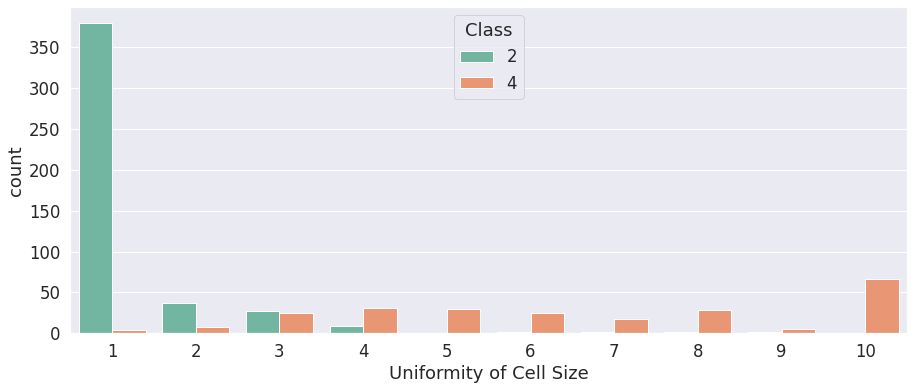

In [21]:
plt.figure(figsize=(15,6))
sns.set(font_scale = 1.5)
sns.countplot(x = 'Uniformity of Cell Size', hue = 'Class', data = df, palette = 'Set2')

<AxesSubplot:xlabel='Uniformity of Cell Shape', ylabel='count'>

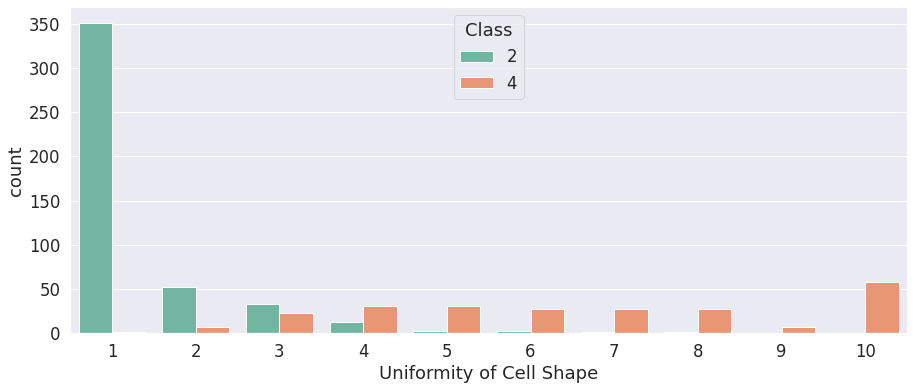

In [22]:
plt.figure(figsize=(15,6))
sns.set(font_scale = 1.5)
sns.countplot(x = 'Uniformity of Cell Shape', hue = 'Class', data = df, palette = 'Set2')

<AxesSubplot:xlabel='Marginal Adhesion', ylabel='count'>

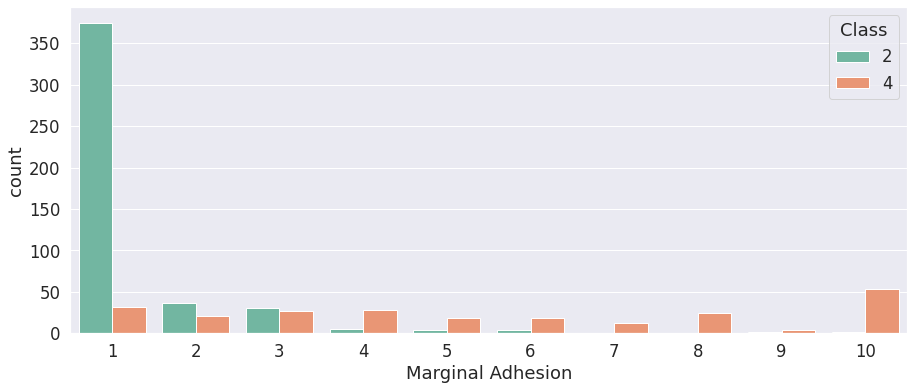

In [23]:
plt.figure(figsize=(15,6))
sns.set(font_scale = 1.5)
sns.countplot(x = 'Marginal Adhesion', hue = 'Class', data = df, palette = 'Set2')

<AxesSubplot:xlabel='Single Epithelial Cell Size', ylabel='count'>

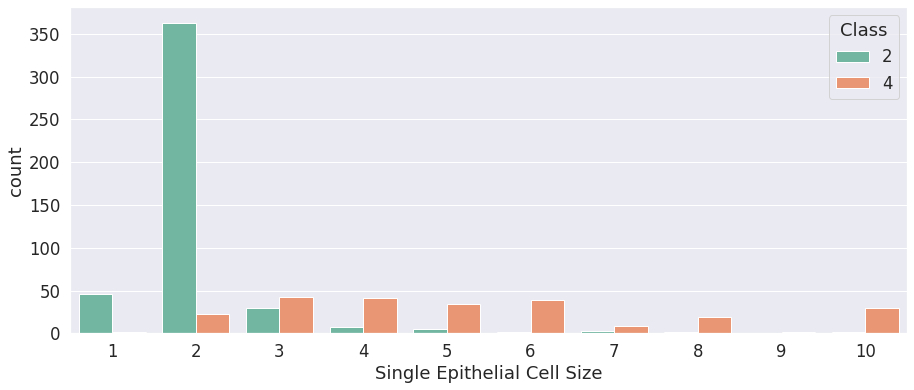

In [24]:
plt.figure(figsize=(15,6))
sns.set(font_scale = 1.5)
sns.countplot(x = 'Single Epithelial Cell Size', hue = 'Class', data = df, palette = 'Set2')

<AxesSubplot:xlabel='Bare Nuclei', ylabel='count'>

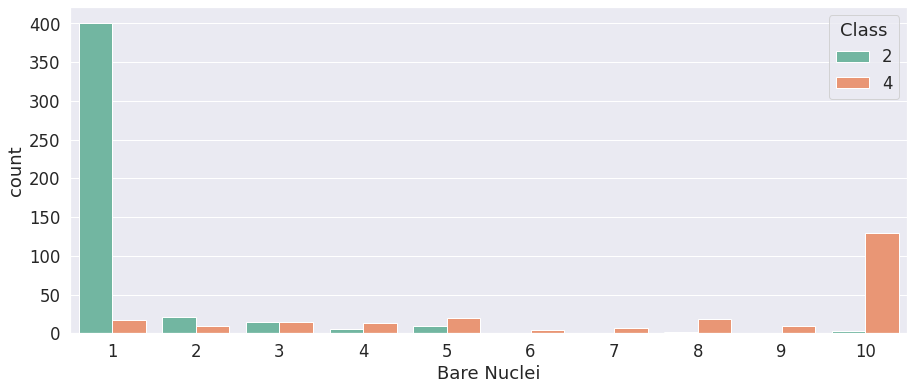

In [25]:
plt.figure(figsize=(15,6))
sns.set(font_scale = 1.5)
sns.countplot(x = 'Bare Nuclei', hue = 'Class', data = df, palette = 'Set2')

<AxesSubplot:xlabel='Bland Chromatin', ylabel='count'>

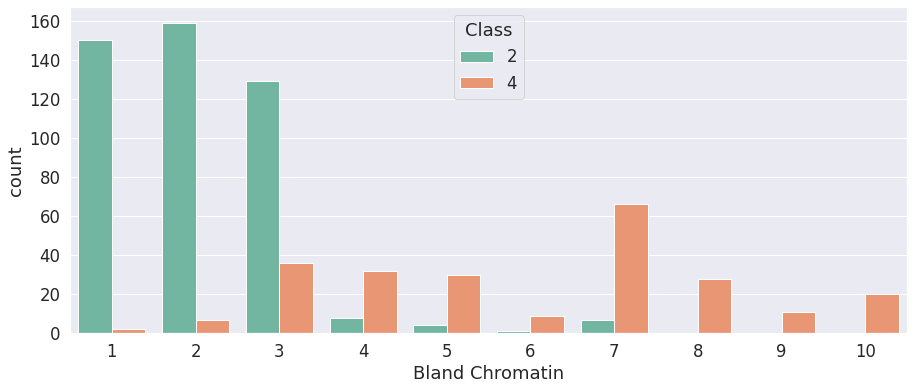

In [26]:
plt.figure(figsize=(15,6))
sns.set(font_scale = 1.5)
sns.countplot(x = 'Bland Chromatin', hue = 'Class', data = df, palette = 'Set2')

<AxesSubplot:xlabel='Normal Nucleoli', ylabel='count'>

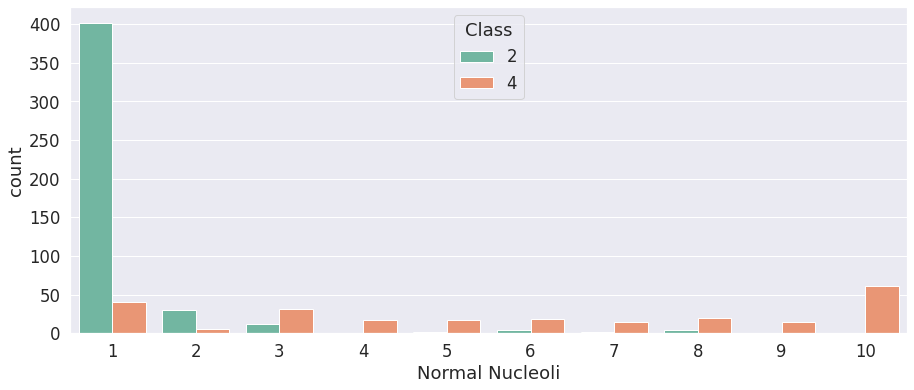

In [27]:
plt.figure(figsize=(15,6))
sns.set(font_scale = 1.5)
sns.countplot(x = 'Normal Nucleoli', hue = 'Class', data = df, palette = 'Set2')

<AxesSubplot:xlabel='Mitoses', ylabel='count'>

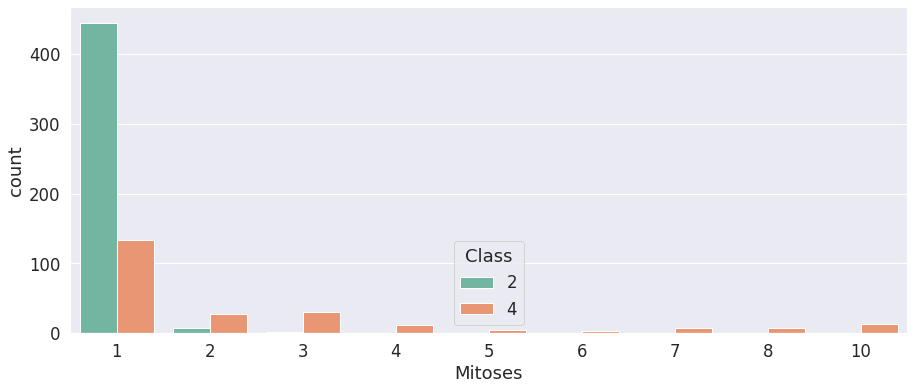

In [28]:
plt.figure(figsize=(15,6))
sns.set(font_scale = 1.5)
sns.countplot(x = 'Mitoses', hue = 'Class', data = df, palette = 'Set2')

## Classification Methods

### Import packages

In [29]:
import csv
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn import metrics

# Decision trees
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import export_graphviz
from six import StringIO
from IPython.display import Image
import pydotplus

# GaussianNB
from sklearn.naive_bayes import GaussianNB

# Random Forest
from sklearn.ensemble import RandomForestClassifier

# Discriminant Analysis
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis, QuadraticDiscriminantAnalysis

### Feature Selection

In [30]:
feature_cols = ['Clump Thickness','Uniformity of Cell Size','Uniformity of Cell Shape','Marginal Adhesion','Single Epithelial Cell Size','Bare Nuclei','Bland Chromatin','Normal Nucleoli','Mitoses']
X = df[feature_cols]
y = df['Class']

### Splitting Data

In [31]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)

### Confusion Matrix toString

In [32]:
def confusion_matrix_toString(matrix):
    print('The confusion matrix shows that',matrix[0][0],'+',matrix[1][1],'are correct predictions and',matrix[1][0],'+',matrix[0][1],'are incorrect predictions.')

### Decision Tree Classifier
#### Experimental Tool for Scikit-Learn Decision Tree

In [33]:
class DecisionTreesExperimentalTool():
    def __init__(self, X_train, y_train, X_test, y_test, feature_cols, max_depth):
        self.records = []
        self.best = None
        self.bestRecord = None
        self.feature_cols = feature_cols
        maxAcc = 0
        for criterion in ['gini', 'entropy', 'log_loss']:
            for i in range(1, max_depth+1):
                clf = DecisionTreeClassifier(criterion=criterion, max_depth=i)
                clf = clf.fit(X_train, y_train,
                              sample_weight=None, check_input=True)
                y_pred = clf.predict(X_test)
                acc = metrics.accuracy_score(y_test, y_pred)
                er = self.ExperimentsRecord(criterion, i, acc)
                self.records.append(er)
                if(acc > maxAcc):
                    maxAcc = acc
                    self.best = clf
                    self.y_pred = y_pred
                    self.bestRecord = er

        with open('Result/experimental-result.csv', '+w') as stream:
            writer = csv.writer(stream)
            writer.writerow(['criterion', 'max_depth', 'accuracy'])
            writer.writerows(self.records)

    def showBest(self):
        dot_data = StringIO()
        export_graphviz(self.best, out_file=dot_data, filled=True, rounded=True,
                        special_characters=True, feature_names=self.feature_cols, class_names=['2', '4'])
        graph = pydotplus.graph_from_dot_data(dot_data.getvalue())
        graph.write_png('Result/best-decision-tree.png')
        return self.bestRecord, Image(graph.create_png()), metrics.confusion_matrix(y_test, self.y_pred)

    class ExperimentsRecord():
        def __init__(self, criterion, max_depth, accuracy):
            self.criterion = criterion
            self.max_depth = max_depth
            self.accuracy = accuracy

        def __repr__(self):
            return f"News({self.criterion!r}, {self.max_depth!r}, {self.accuracy!r})"

        def __iter__(self):
            return iter([self.criterion, self.max_depth, self.accuracy])

        def __str__(self):
            return "The best accuracy is " + str(self.accuracy) + " with criterion : " + str(self.criterion) + " and max_depth : " + str(self.max_depth) + " ."

#### Experiment

In [34]:
ex_1 = DecisionTreesExperimentalTool(X_train, y_train, X_test, y_test, feature_cols, 10)

#### Experimental Results

In [35]:
pd.read_csv('Result/experimental-result.csv',sep=',')

,criterion,max_depth,accuracy
0,gini,1,0.928571
1,gini,2,0.928571
2,gini,3,0.938095
3,gini,4,0.942857
4,gini,5,0.942857
5,gini,6,0.938095
6,gini,7,0.938095
7,gini,8,0.938095
8,gini,9,0.942857
9,gini,10,0.938095


#### Best Result

In [36]:
best_record, best_tree_image, ex_1_confusion_matrix = ex_1.showBest()

In [37]:
print(best_record)
confusion_matrix_toString(ex_1_confusion_matrix)
print('confusion_matrix :\n', ex_1_confusion_matrix)

The best accuracy is 0.9523809523809523 with criterion : entropy and max_depth : 5 .
The confusion matrix shows that 133 + 67 are correct predictions and 6 + 4 are incorrect predictions.
confusion_matrix :
 [[133   4]
 [  6  67]]


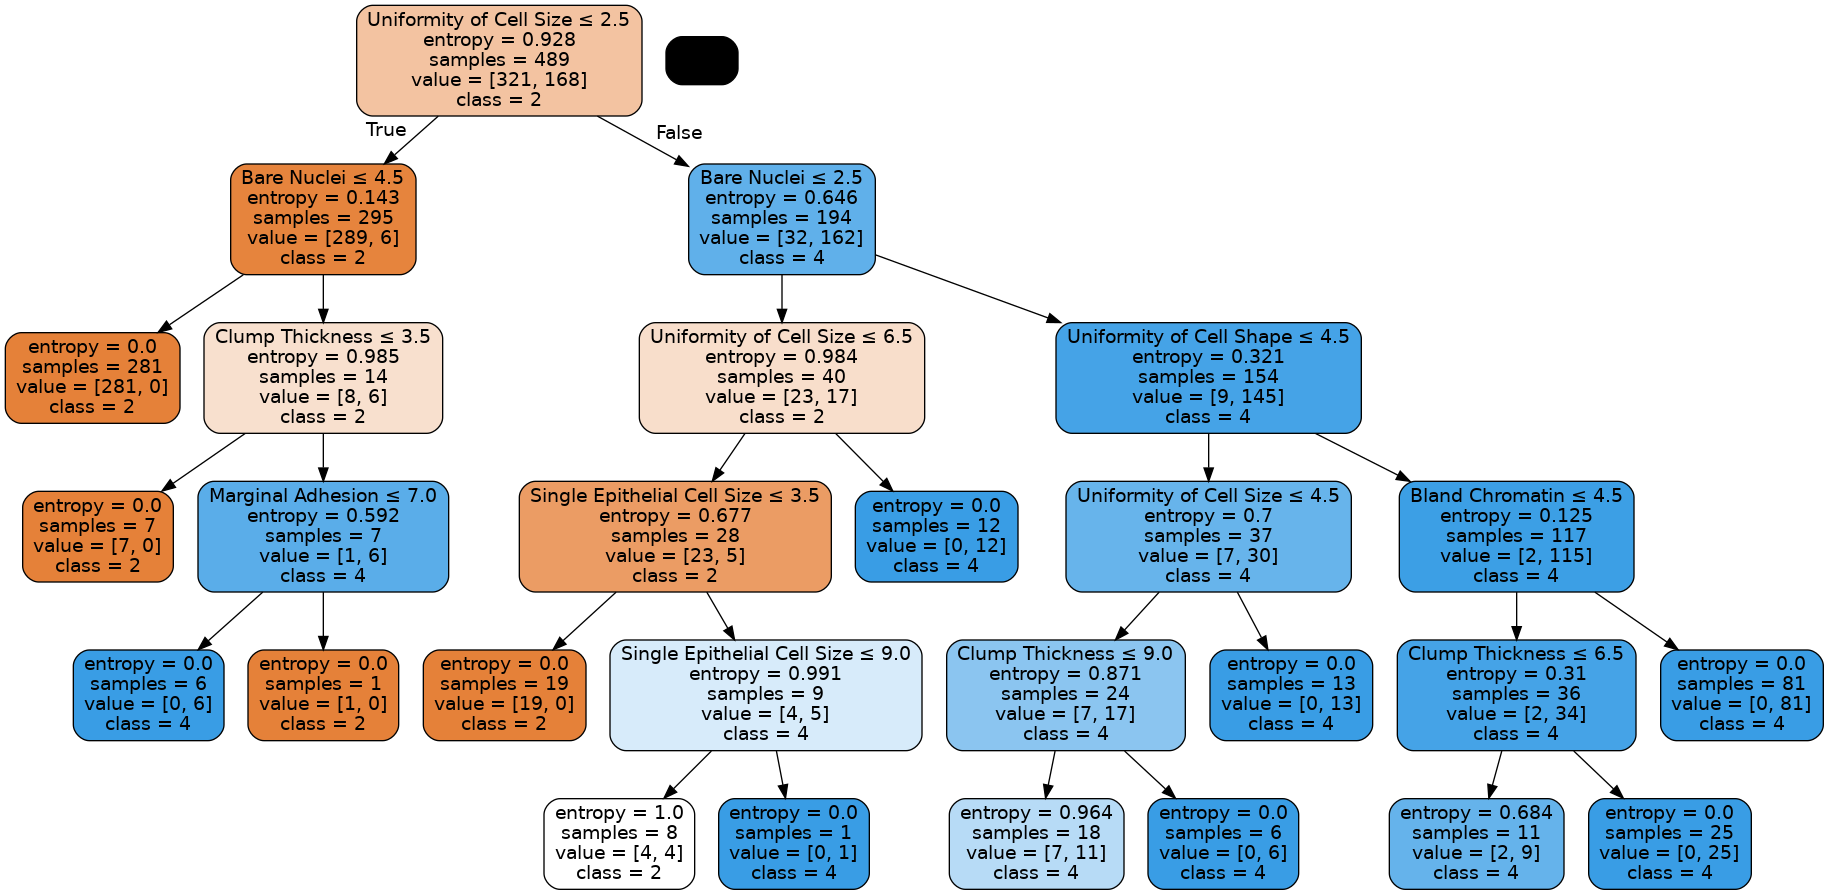

In [38]:
best_tree_image

### Gaussian Naive Bayes Classifier

In [39]:
GNB_clf = GaussianNB()
GNB_clf = GNB_clf.fit(X_train, y_train)
GNB_y_pred = GNB_clf.predict(X_test)

In [40]:
print("Accuracy:",metrics.accuracy_score(y_test, GNB_y_pred))

Accuracy: 0.9714285714285714


In [41]:
GNB_confusion_matrix = metrics.confusion_matrix(y_test, GNB_y_pred)
confusion_matrix_toString(GNB_confusion_matrix)
print('confusion_matrix :\n', GNB_confusion_matrix)

The confusion matrix shows that 132 + 72 are correct predictions and 1 + 5 are incorrect predictions.
confusion_matrix :
 [[132   5]
 [  1  72]]


### Random Forest Classifier
#### Experimental Tool for Scikit-Learn Random Forest

In [42]:
class RandomForestExperimentalTool():
    def __init__(self, X_train, y_train, X_test, y_test, feature_cols, max_depth):
        self.records = []
        self.y_pred = None
        self.bestRecord = None
        self.feature_cols = feature_cols
        maxAcc = 0
        for criterion in ['gini', 'entropy', 'log_loss']:
            for i in range(1, max_depth+1):
                clf = RandomForestClassifier(criterion=criterion, max_depth=i, bootstrap=True)
                clf = clf.fit(X_train, y_train)
                y_pred = clf.predict(X_test)
                acc = metrics.accuracy_score(y_test, y_pred)
                er = self.ExperimentsRecord(criterion, i, acc)
                self.records.append(er)
                if(acc > maxAcc):
                    maxAcc = acc
                    self.y_pred = y_pred
                    self.bestRecord = er

        with open('Result/random-forest-result.csv', '+w') as stream:
            writer = csv.writer(stream)
            writer.writerow(['criterion', 'max_depth', 'accuracy'])
            writer.writerows(self.records)

    def showBest(self):
        return self.bestRecord, metrics.confusion_matrix(y_test, self.y_pred)

    class ExperimentsRecord():
        def __init__(self, criterion, max_depth, accuracy):
            self.criterion = criterion
            self.max_depth = max_depth
            self.accuracy = accuracy

        def __repr__(self):
            return f"News({self.criterion!r}, {self.max_depth!r}, {self.accuracy!r})"

        def __iter__(self):
            return iter([self.criterion, self.max_depth, self.accuracy])

        def __str__(self):
            return "The best accuracy is " + str(self.accuracy) + " with criterion : " + str(self.criterion) + " and max_depth : " + str(self.max_depth) + " ."

#### Experiment

In [43]:
ex_2 = RandomForestExperimentalTool(X_train, y_train, X_test, y_test, feature_cols, 10)

#### Experimental Results

In [44]:
pd.read_csv('Result/random-forest-result.csv',sep=',')

,criterion,max_depth,accuracy
0,gini,1,0.961905
1,gini,2,0.976190
2,gini,3,0.985714
3,gini,4,0.980952
4,gini,5,0.980952
5,gini,6,0.971429
6,gini,7,0.966667
7,gini,8,0.961905
8,gini,9,0.971429
9,gini,10,0.971429


#### Best Result

In [45]:
best_forest_record, ex_2_confusion_matrix = ex_2.showBest()

In [46]:
print(best_forest_record)
confusion_matrix_toString(ex_2_confusion_matrix)
print('confusion_matrix :\n', ex_1_confusion_matrix)

The best accuracy is 0.9857142857142858 with criterion : gini and max_depth : 3 .
The confusion matrix shows that 135 + 72 are correct predictions and 1 + 2 are incorrect predictions.
confusion_matrix :
 [[133   4]
 [  6  67]]


### Discriminant Analysis
#### Quadratic Discriminant Analysis

In [47]:
QDA_clf = QuadraticDiscriminantAnalysis()
QDA_clf = QDA_clf.fit(X_train, y_train)
QDA_y_pred = QDA_clf.predict(X_test)

In [48]:
print("Accuracy:",metrics.accuracy_score(y_test, QDA_y_pred))

Accuracy: 0.9523809523809523


In [49]:
QDA_confusion_matrix = metrics.confusion_matrix(y_test, QDA_y_pred)
confusion_matrix_toString(QDA_confusion_matrix)
print('confusion_matrix :\n', QDA_confusion_matrix)

The confusion matrix shows that 128 + 72 are correct predictions and 1 + 9 are incorrect predictions.
confusion_matrix :
 [[128   9]
 [  1  72]]


#### Linear Discriminant Analysis

In [50]:
LDA_clf = LinearDiscriminantAnalysis()
LDA_clf = LDA_clf.fit(X_train, y_train)
LDA_y_pred = LDA_clf.predict(X_test)
print("Accuracy:",metrics.accuracy_score(y_test, LDA_y_pred))
LDA_confusion_matrix = metrics.confusion_matrix(y_test, LDA_y_pred)
confusion_matrix_toString(LDA_confusion_matrix)
print('confusion_matrix :\n', LDA_confusion_matrix)

Accuracy: 0.9476190476190476
The confusion matrix shows that 136 + 63 are correct predictions and 10 + 1 are incorrect predictions.
confusion_matrix :
 [[136   1]
 [ 10  63]]
